# Fields of The World (FoTW) Dataset

## Intro

Fields of The World (FoTW) [(Kerner at al. 2024)](https://arxiv.org/abs/2409.16252) is a comprehensive global dataset for agricultural field boundary delineation using multi-temporal satellite imagery. The dataset provides field boundary annotations across diverse agricultural landscapes worldwide, enabling automated field mapping for precision agriculture, crop monitoring, and food security applications.

## Dataset Characteristics

- **Modalities**: 
  - Multi-temporal Sentinel-2 optical imagery
- **Spatial Resolution**: 10m (resampled from native Sentinel-2 bands)
- **Temporal Resolution**: Multi-temporal composites across growing seasons
- **Spectral Bands**: 
  - S2: 10 bands (B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12)
- **Image Dimensions**: 256x256 pixels per patch
- **Labels**: Agricultural field boundary segmentation
  - Binary segmentation (field boundaries vs. non-boundaries)
  - Precise boundary delineation for field mapping
- **Geographic Distribution**: Global coverage across major agricultural regions
- **Temporal Coverage**: Multiple growing seasons (2019-2021)

## Dataset Setup and Initialization

In [1]:
from pathlib import Path

from geobench_v2.datamodules import GeoBenchFieldsOfTheWorldDataModule

# Setup paths
PROJECT_ROOT = Path("../../")

# Initialize datamodule
datamodule = GeoBenchFieldsOfTheWorldDataModule(
    img_size=256,
    batch_size=8,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "fotw",
    download=True,
)
datamodule.setup("fit")
datamodule.setup("test")

print("FoTW datamodule initialized successfully!")
print(f"Training samples: {len(datamodule.train_dataset)}")
print(f"Validation samples: {len(datamodule.val_dataset)}")
print(f"Test samples: {len(datamodule.test_dataset)}")

Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
FoTW datamodule initialized successfully!
Training samples: 4000
Validation samples: 1000
Test samples: 2000


## Geographic Distribution Visualization

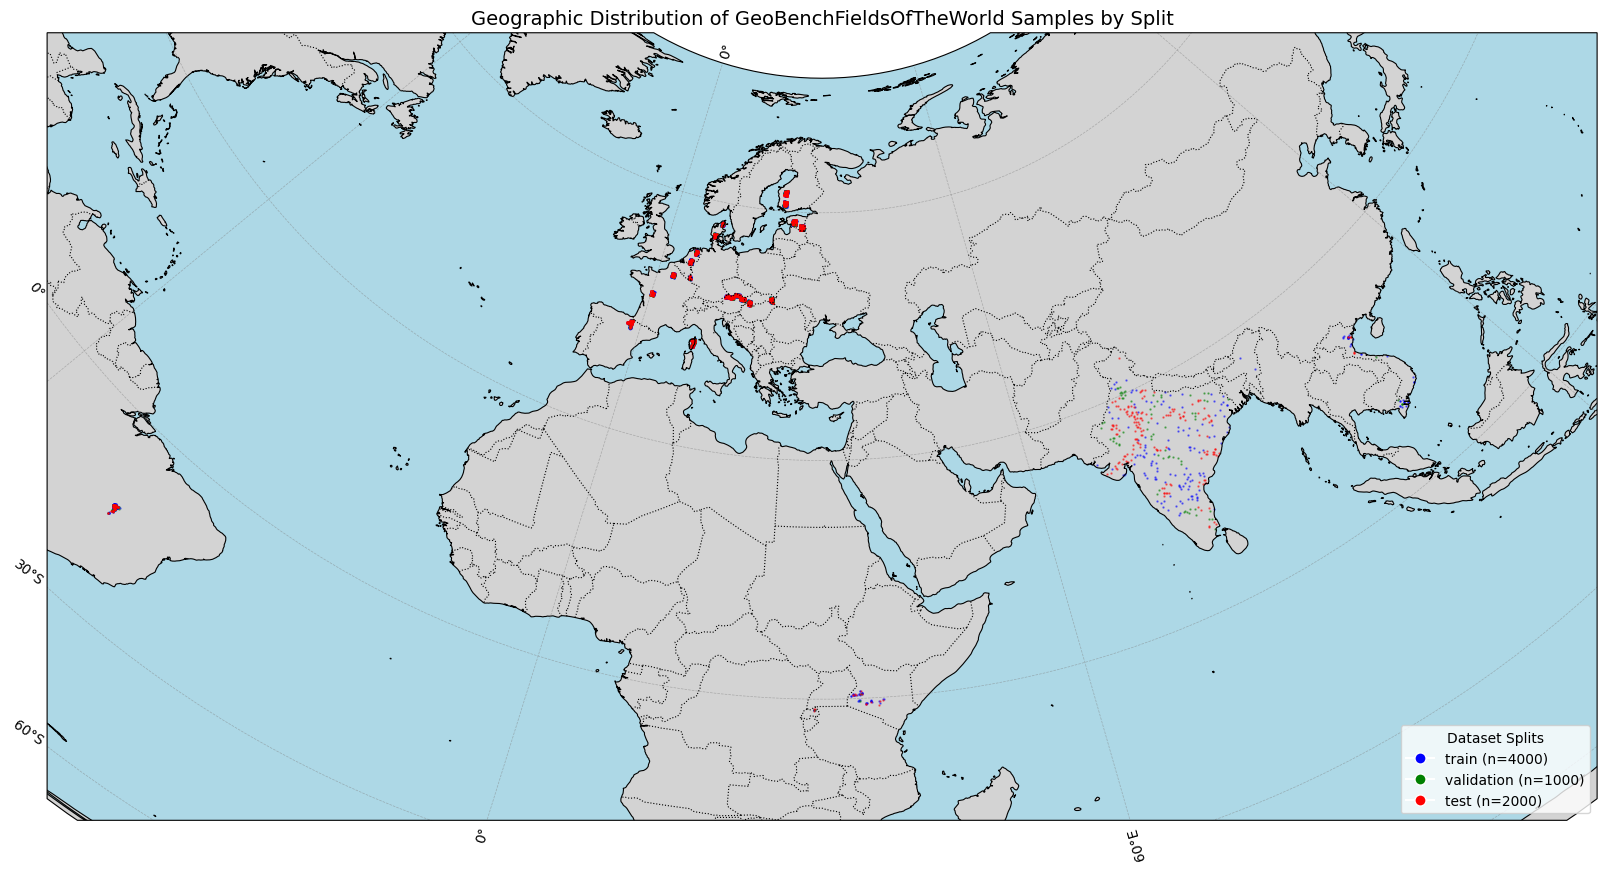

In [2]:
geo_fig = datamodule.visualize_geospatial_distribution()

## Sample Data Visualization

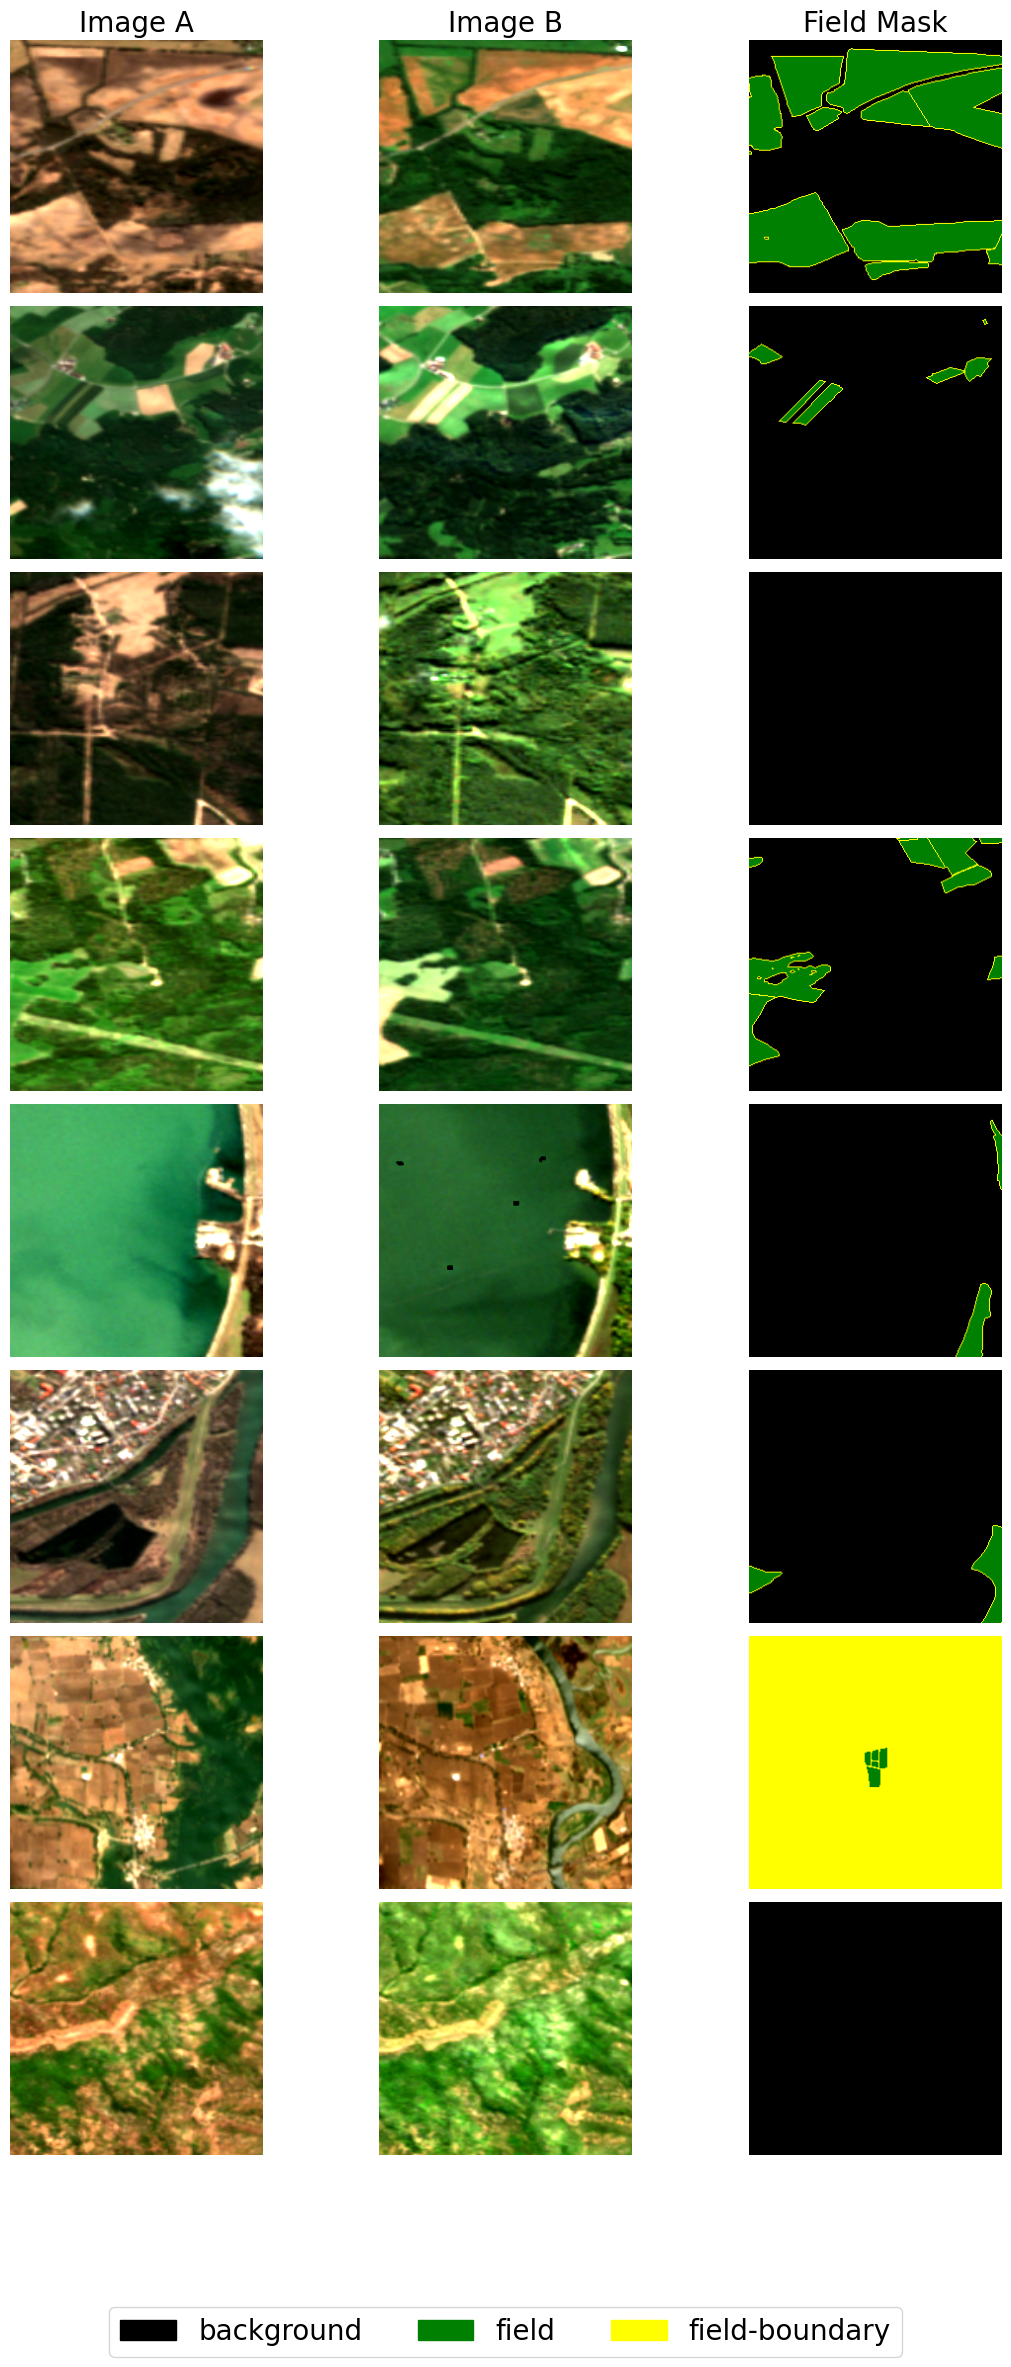

In [3]:
fig, batch = datamodule.visualize_batch()

## GeoBenchV2 Processing Pipeline

### Preprocessing Steps

1. **Sample filtering**:
   - Dataset was filtered to only contain data that is released under open CC-BY license, namely:
      "austria", "brazil", "corsica", "denmark", "estonia", "finland", "france", "india","kenya", "luxembourg","netherlands", "rwanda", "slovakia", "spain", "vietnam"

2. **Split Generation**:
   - Use the existing train/val/test splits from the dataset

3. **Dataset Subsampling**:
    - The final version consists of
        - 4,000 training samples
        - 1,000 validation samples
        - 2,000 test samples


## References

1. Kerner, H., Chaudhari, S., Ghosh, A., Robinson, C., Ahmad, A., Choi, E., Jacobs, N., Holmes, C., Mohr, M., Dodhia, R. and Ferres, J.M.L., 2025, April. Fields of the world: A machine learning benchmark dataset for global agricultural field boundary segmentation. In Proceedings of the AAAI Conference on Artificial Intelligence (Vol. 39, No. 27, pp. 28151-28159).

2. Fields of The World Website: https://fieldsofthe.world/
